In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

import eli5
from sklearn import tree
import lime
import lime.lime_tabular
from lime import lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\Machine Learning\heart_failure_clinical_records_dataset.csv')
dataset

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

### EXPLORATORY DATA ANALYSIS

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                             AxesSubplot(0.125,0.71587;0.168478x0.16413)
anaemia                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
creatinine_phosphokinase     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
diabetes                     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ejection_fraction              AxesSubplot(0.125,0.518913;0.168478x0.16413)
high_blood_pressure         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
platelets                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
serum_creatinine            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
serum_sodium                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
sex                         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
smoking                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
time                        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
DEATH_EVENT                       AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: objec

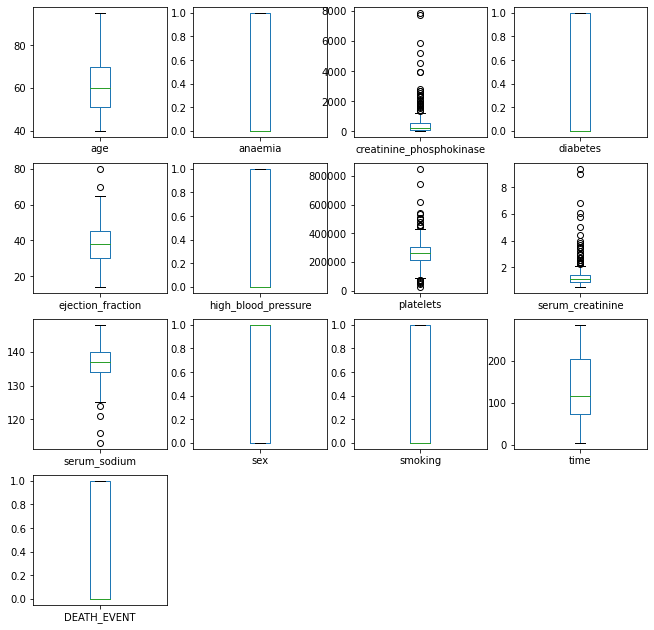

In [4]:
dataset.plot(kind="box", subplots=True, layout=(4,4), figsize=(11,11))

<AxesSubplot:>

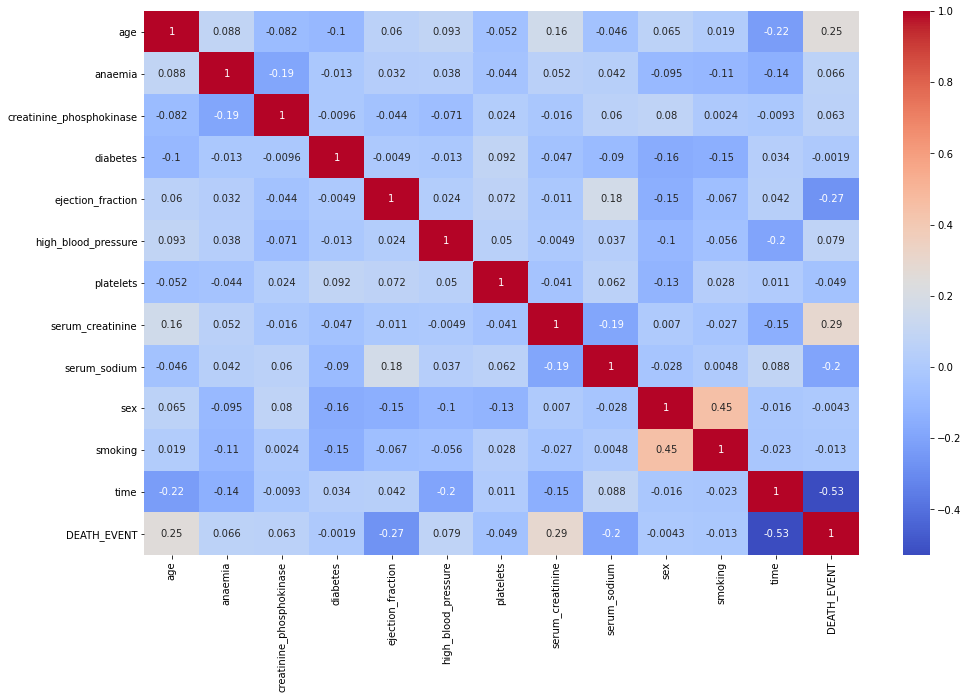

In [5]:
plt.figure(figsize=(16, 10))
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64


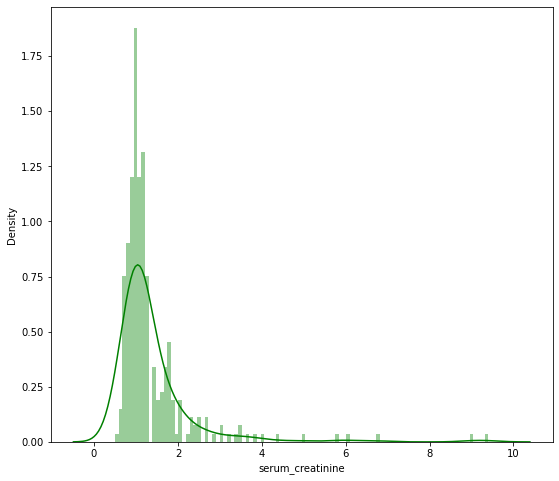

In [56]:
print(dataset['serum_creatinine'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['serum_creatinine'], color='g', bins=100, hist_kws={'alpha': 0.4});

### PERFORMING SPLIT IN THE DATASET

In [7]:
#defining predictors
X = dataset.drop(columns = ["DEATH_EVENT"])
y = dataset["DEATH_EVENT"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
print(f"No. of training examples:{X_train.shape[0]}")
print(f"No. of testing examples:{X_test.shape[0]}")

No. of training examples:239
No. of testing examples:60


### PRE-DEFINED FUNCTIONS

In [9]:
def model_matrices(pred):
    cm = confusion_matrix(y_test, pred)
    print(cm)

    ax=sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',linewidths= 5,cmap="Reds")

    ax.set_xlabel("\nPredicted Values") 
    ax.set_ylabel("Actual values");

In [10]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### PERFORMING LOGISTIC REGRESSION

In [11]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)
acclr= metrics.accuracy_score(y_test,pred_lr)
print("Accuracy:", acclr*100, "%")

Accuracy: 81.66666666666667 %


In [12]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.67      0.71      0.69        17

    accuracy                           0.82        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.82      0.82      0.82        60



[[37  6]
 [ 5 12]]


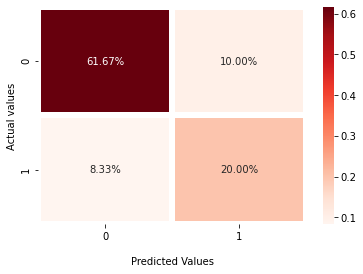

In [13]:
model_matrices(pred_lr)

AUC: 0.78


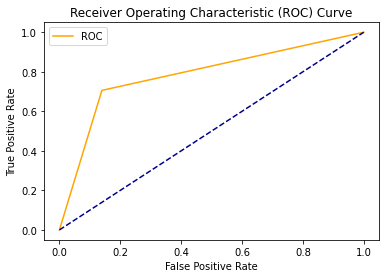

In [14]:
auc = roc_auc_score(y_test, pred_lr)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
plot_roc_curve(fpr, tpr)

In [15]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr = grid_search.fit(X, y)
# summarize results
print("Best: ", lr.best_score_, lr.best_params_)

Best:  0.8350574712643677 {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


### PERFORMING DECISION TREE

In [16]:
dtc=DecisionTreeClassifier(max_depth=None)
dtc.fit(X_train, y_train)
pred_dtc=dtc.predict(X_test)
accdtc= metrics.accuracy_score(y_test,pred_dtc)
print("Accuracy:", accdtc*100, "%")

Accuracy: 71.66666666666667 %


In [17]:
print('Classification Report:')
print(classification_report(y_test, pred_dtc))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.50      0.53      0.51        17

    accuracy                           0.72        60
   macro avg       0.65      0.66      0.66        60
weighted avg       0.72      0.72      0.72        60



[[34  9]
 [ 8  9]]


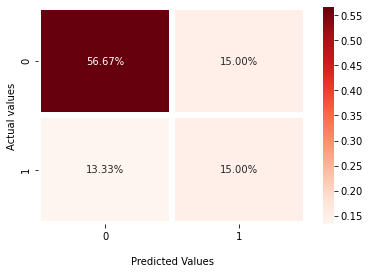

In [18]:
model_matrices(pred_dtc)

AUC: 0.66


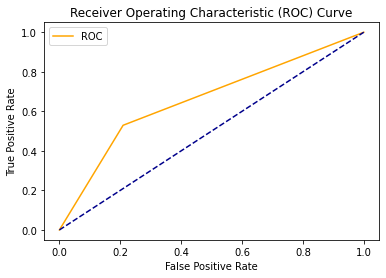

In [19]:
auc = roc_auc_score(y_test, pred_dtc)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_dtc)
plot_roc_curve(fpr, tpr)

In [20]:
tree_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
dt = GridSearchCV(dtc, tree_params, cv = 10, scoring='accuracy')
dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [21]:
print(dt.best_params_)
dt.best_score_

{'max_depth': 14, 'max_features': 7}


0.8248188405797101

### PERFORMING RANDOM FOREST CLASSIFIER

In [47]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
accrfc= metrics.accuracy_score(y_test,pred_rfc)
print("Accuracy:", accrfc*100, "%")

Accuracy: 83.33333333333334 %


In [23]:
print('Classification Report:')
print(classification_report(y_test, pred_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.69      0.65      0.67        17

    accuracy                           0.82        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.81      0.82      0.81        60



[[38  5]
 [ 6 11]]


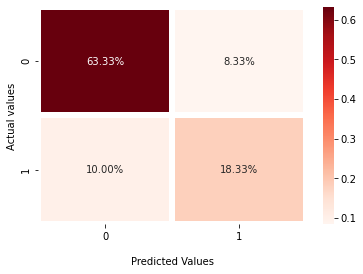

In [24]:
model_matrices(pred_rfc)

AUC: 0.77


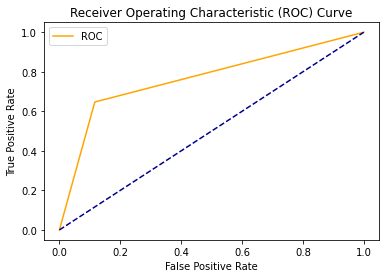

In [25]:
auc = roc_auc_score(y_test, pred_rfc)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)
plot_roc_curve(fpr, tpr)

In [26]:
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
rf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [27]:
print(rf.best_params_)
rf.best_score_

{'max_depth': 12, 'max_features': 3}


0.8581521739130435

### PERFORMING XGBOOST

In [28]:
xgbc=XGBClassifier()
xgbc.fit(X_train, y_train)
pred_xgbc=xgbc.predict(X_test)
accxgbc= metrics.accuracy_score(y_test,pred_xgbc)
print("Accuracy:", accxgbc*100, "%")

[18:44:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 75.0 %


In [29]:
print('Classification Report:')
print(classification_report(y_test, pred_xgbc))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.56      0.53      0.55        17

    accuracy                           0.75        60
   macro avg       0.69      0.68      0.69        60
weighted avg       0.75      0.75      0.75        60



[[36  7]
 [ 8  9]]


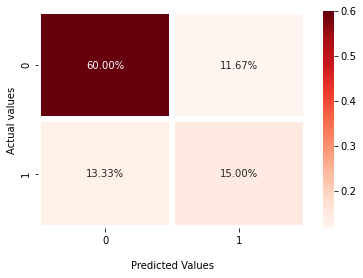

In [30]:
model_matrices(pred_xgbc)

AUC: 0.68


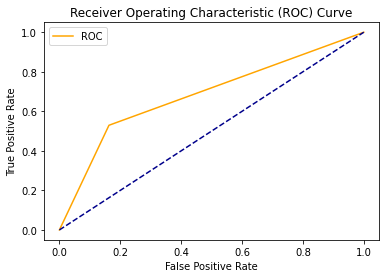

In [31]:
auc = roc_auc_score(y_test, pred_xgbc)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_xgbc)
plot_roc_curve(fpr, tpr)

In [32]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
xgb= GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
xgb.fit(X_train, y_train)
print("Best parameters:", xgb.best_params_)
xgb.best_score_

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[18:45:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 60}


0.9113839285714287

In [33]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'Logistic Regression', 'Accuracy' : acclr*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : accrfc*100},
    
    {'Algorithm' : 'Decision Tree', 'Accuracy' : accdtc*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : accxgbc*100}
    
])

results_123.sort_values(by=['Accuracy'], ascending=False)

Algorithm   Accuracy
0      Logistic Regression  81.666667
1            Random Forest  81.666667
3  XGBoost Algorithm (XGB)  75.000000
2            Decision Tree  71.666667

In [34]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'Logistic Regression', 'Accuracy' : lr.best_score_*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf.best_score_*100},
    
    {'Algorithm' : 'Decision Tree', 'Accuracy' : dt.best_score_*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xgb.best_score_*100}
    
])

results_123.sort_values(by=['Accuracy'], ascending=False)

Algorithm   Accuracy
3  XGBoost Algorithm (XGB)  91.138393
1            Random Forest  85.815217
0      Logistic Regression  83.505747
2            Decision Tree  82.481884

### Interpretability ELI5 -- “Explain Like I’m 5”

In [35]:
lr = LogisticRegression(penalty = 'none', n_jobs = 3 , max_iter = 600 , C = 0.9)
lr.fit(X_train , y_train)
log_pred = lr.predict(X_test)

eli5.explain_weights(lr, feature_names = X_train.columns.tolist())

Explanation(estimator="LogisticRegression(C=0.9, max_iter=600, n_jobs=3, penalty='none')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='age', weight=0.0666519270663925, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.006502076522987627, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.005408908467121154, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.0005109606422534052, std=None, value=None), FeatureWeight(feature='smoking', weight=0.0003417507071510282, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=0.00029905737193443923, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.00021503371943976037, std=None, value=None), FeatureWeight(feature='sex', weight=0.00017753357369776175, std=None, value=None), FeatureWeight(feature='diabetes', weight=1.9627646715400586e-05, std=None, value=None)], neg=[FeatureWeight(feature='ejection_fraction', weight=-0.08148650922894496, std=None, value=None), FeatureWeight(feature='time', weight=-0.020899134866898643, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=-0.00041609393916349104, std=None, value=None), FeatureWeight(feature='platelets', weight=-1.728369441558768e-06, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [36]:
eli5.explain_prediction(lr, X_test.reset_index(drop = True).loc[35])

Explanation(estimator="LogisticRegression(C=0.9, max_iter=600, n_jobs=3, penalty='none')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='time', weight=5.809959492997823, std=None, value=278.0), FeatureWeight(feature='ejection_fraction', weight=4.8891905537366975, std=None, value=60.0), FeatureWeight(feature='platelets', weight=1.2824501256366059, std=None, value=742000.0)], neg=[FeatureWeight(feature='age', weight=-2.9993367179876627, std=None, value=45.0), FeatureWeight(feature='serum_sodium', weight=-0.7464293684627192, std=None, value=138.0), FeatureWeight(feature='creatinine_phosphokinase', weight=-0.6160581861849448, std=None, value=2060.0), FeatureWeight(feature='serum_creatinine', weight=-0.005201661218390102, std=None, value=0.8), FeatureWeight(feature='<BIAS>', weight=-0.00021503371943976037, std=None, value=1.0), FeatureWeight(feature='diabetes', weight=-1.9627646715400586e-05, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9995069168721882, score=-7.614339577151255, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [37]:
eli5.explain_prediction(lr, X_test.reset_index(drop = True).loc[5])

Explanation(estimator="LogisticRegression(C=0.9, max_iter=600, n_jobs=3, penalty='none')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='ejection_fraction', weight=3.2594603691577984, std=None, value=40.0), FeatureWeight(feature='time', weight=2.2362074307581548, std=None, value=107.0), FeatureWeight(feature='platelets', weight=0.4551799712411173, std=None, value=263358.03), FeatureWeight(feature='high_blood_pressure', weight=0.00041609393916349104, std=None, value=1.0)], neg=[FeatureWeight(feature='age', weight=-3.065988645054055, std=None, value=46.0), FeatureWeight(feature='serum_sodium', weight=-0.7410204599955981, std=None, value=137.0), FeatureWeight(feature='creatinine_phosphokinase', weight=-0.21502225042086182, std=None, value=719.0), FeatureWeight(feature='serum_creatinine', weight=-0.0076724502971254, std=None, value=1.18), FeatureWeight(feature='<BIAS>', weight=-0.00021503371943976037, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.8722883464437869, score=-1.9213450256091538, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [38]:
dt = tree.DecisionTreeClassifier(min_samples_split = 0.5 , max_features = 9, max_depth = 8 , criterion = "gini")
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

eli5.explain_weights (dt, feature_names = X_train.columns.tolist())

Explanation(estimator='DecisionTreeClassifier(max_depth=8, max_features=9, min_samples_split=0.5)', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='time', weight=0.7674167677337004, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.15836708854002862, std=None, value=None), FeatureWeight(feature='age', weight=0.06049651867093839, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.01371962505533264, std=None, value=None), FeatureWeight(feature='smoking', weight=0.0, std=None, value=None), FeatureWeight(feature='sex', weight=0.0, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.0, std=None, value=None), FeatureWeight(feature='platelets', weight=0.0, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.0, std=None, value=None), FeatureWeight(feature='ejection_fraction', weight=0.0, std=None, value=None), FeatureWeight(feature='diabetes', weight=0.0, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[160.0, 79.0], value_ratio=[0.6694560669456067, 0.3305439330543933], impurity=0.4425692827506521, samples=239, sample_ratio=1.0, feature_name='time', feature_id=11, threshold=67.5, left=NodeInfo(id=1, is_leaf=True, value=[7.0, 50.0], value_ratio=[0.12280701754385964, 0.8771929824561403], impurity=0.21545090797168365, samples=57, sample_ratio=0.2384937238493724, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=2, is_leaf=False, value=[153.0, 29.0], value_ratio=[0.8406593406593407, 0.15934065934065933], impurity=0.26790242724308655, samples=182, sample_ratio=0.7615062761506276, feature_name='serum_creatinine', feature_id=7, threshold=1.550000011920929, left=NodeInfo(id=3, is_leaf=False, value=[135.0, 12.0], value_ratio=[0.9183673469387755, 0.08163265306122448], impurity=0.14993752603082044, samples=147, sample_ratio=0.6150627615062761, feature_name='age', feature_id=0, threshold=79.0, left=NodeInfo(id=4, is_leaf=False, value=[132.0, 8.0], value_ratio=[0.9428571428571428, 0.05714285714285714], impurity=0.10775510204081629, samples=140, sample_ratio=0.5857740585774058, feature_name='anaemia', feature_id=1, threshold=0.5, left=NodeInfo(id=5, is_leaf=True, value=[81.0, 1.0], value_ratio=[0.9878048780487805, 0.012195121951219513], impurity=0.024092801903628835, samples=82, sample_ratio=0.34309623430962344, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=6, is_leaf=True, value=[51.0, 7.0], value_ratio=[0.8793103448275862, 0.1206896551724138], impurity=0.21224732461355533, samples=58, sample_ratio=0.24267782426778242, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=7, is_leaf=True, value=[3.0, 4.0], value_ratio=[0.42857142857142855, 0.5714285714285714], impurity=0.4897959183673469, samples=7, sample_ratio=0.029288702928870293, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=8, is_leaf=True, value=[18.0, 17.0], value_ratio=[0.5142857142857142, 0.4857142857142857], impurity=0.4995918367346939, samples=35, sample_ratio=0.14644351464435146, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), graphviz='digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="time <= 67.5\\ngini = 0.443\\nsamples = 100.0%\\nvalue = [0.669, 0.331]"] ;\n1 [label="gini = 0.215\\nsamples = 23.8%\\nvalue = [0.123, 0.877]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="serum_creatinine <= 1.55\\ngini = 0.268\\nsamples = 76.2%\\nvalue = [0.841, 0.159]"] ;\n0 -> 

In [39]:
 eli5.explain_prediction(dt, X_test.reset_index (drop = True).loc[35])

Explanation(estimator='DecisionTreeClassifier(max_depth=8, max_features=9, min_samples_split=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6694560669456067, std=None, value=1.0), FeatureWeight(feature='time', weight=0.171203273713734, std=None, value=278.0), FeatureWeight(feature='serum_creatinine', weight=0.07770800627943486, std=None, value=0.8), FeatureWeight(feature='anaemia', weight=0.04494773519163764, std=None, value=0.0), FeatureWeight(feature='age', weight=0.024489795918367308, std=None, value=45.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.9878048780487805, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [40]:
eli5.explain_prediction(dt, X_test.reset_index(drop = True).loc[0])

Explanation(estimator='DecisionTreeClassifier(max_depth=8, max_features=9, min_samples_split=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='time', weight=0.5466490494017471, std=None, value=15.0), FeatureWeight(feature='<BIAS>', weight=0.3305439330543933, std=None, value=1.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.8771929824561403, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### LIME to explain the Random Forest and the XGBoost models

In [43]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Age', 'DEATH_EVENT'],
    mode='classification'
)

In [48]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=rfc.predict_proba
)

exp.show_in_notebook(show_table=True)

In [46]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=xgbc.predict_proba
)

exp.show_in_notebook(show_table=True)

### SHAP library to interpret the XGBoost model

In [49]:
shap.initjs()

In [50]:
X_sampled = X_train.sample(100, random_state=10)

In [51]:
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer.shap_values(X_sampled)

In [52]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

In [53]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

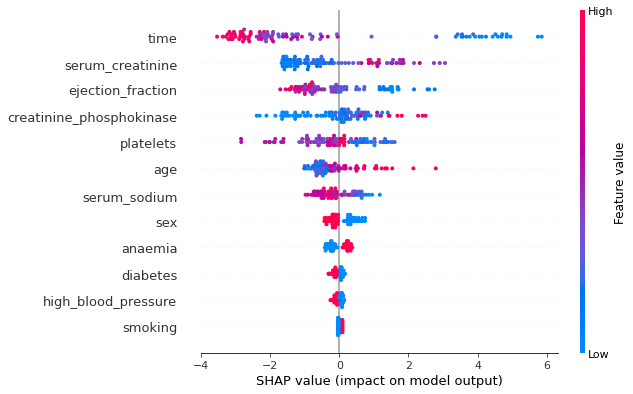

In [54]:
shap.summary_plot(shap_values, X_sampled)

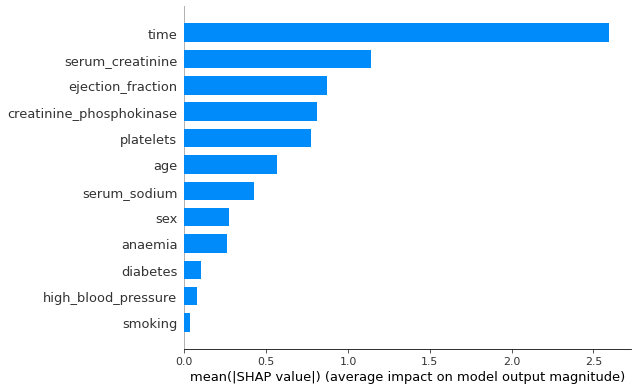

In [55]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")